In [79]:
import pandas as pd
dav=pd.read_csv("avocado.csv",index_col=0,parse_dates=['Date'])

In [80]:
dav.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [81]:
#Checking null values
dav.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [82]:
#Checking datatypes
dav.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

In [83]:
#checking how many types of avacados are present
dav['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

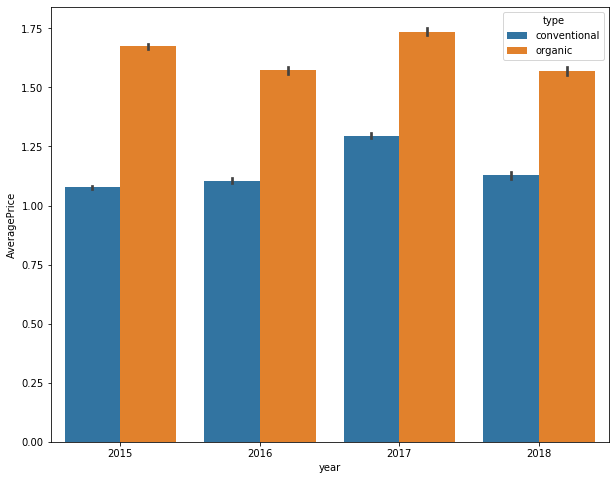

In [84]:
#First lets perform linear regression on the prices
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.barplot(x="year",y="AveragePrice",hue="type",data=dav)
#In 2017 for coneventional and organic average price is high compared to other years

In [85]:
#As datatype is object we are using Label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in dav.columns:
    if dav[col].dtype==object:
        dav[col]=le.fit_transform(dav[col])

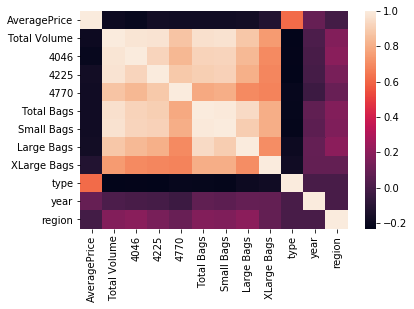

In [86]:
sns.heatmap(dav.corr())

In [87]:
dav.drop("Date",axis=1,inplace=True)

In [88]:
#Lets remove the outliers
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(dav))
dav_new=dav[(z<3).all(axis=1)]

In [89]:
dav_new.shape

(17651, 12)

In [90]:
dav.shape

(18249, 12)

In [91]:
dav_new.skew()

AveragePrice    0.377432
Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
year            0.229976
region          0.012798
dtype: float64

In [92]:
dav_new.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0


In [93]:
x=dav_new.iloc[:,1:]

In [94]:
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...
7,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
8,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
9,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
10,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53


In [95]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.3920086 , -0.34945151, -0.27849691, ..., -1.01904715,
        -1.21001338, -1.69549505],
       [-0.40125088, -0.3502761 , -0.30309279, ..., -1.01904715,
        -1.21001338, -1.69549505],
       [-0.33870193, -0.35000214, -0.14144901, ..., -1.01904715,
        -1.21001338, -1.69549505],
       ...,
       [-0.44184559, -0.34909848, -0.40879759, ...,  0.98130886,
         1.98075592,  1.74705401],
       [-0.43943771, -0.34833475, -0.40747397, ...,  0.98130886,
         1.98075592,  1.74705401],
       [-0.43816945, -0.34522454, -0.40903979, ...,  0.98130886,
         1.98075592,  1.74705401]])

In [96]:
y=dav_new.iloc[:,0:1]

In [97]:
y

,AveragePrice
0,1.33
1,1.35
2,0.93
3,1.08
4,1.28
...,...
7,1.63
8,1.71
9,1.87
10,1.93


In [98]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
max_r_score=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.2)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2 score correspoinding to r_state",r_state ,"is",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
        
print(final_r_state)
print(max_r_score)


r2 score correspoinding to r_state 42 is 0.40897922381452334
r2 score correspoinding to r_state 43 is 0.4297468870200334
r2 score correspoinding to r_state 44 is 0.3863768120838831
r2 score correspoinding to r_state 45 is 0.4079255846404083
r2 score correspoinding to r_state 46 is 0.42322823520748276
r2 score correspoinding to r_state 47 is 0.41539257149124
r2 score correspoinding to r_state 48 is 0.41485807758227566
r2 score correspoinding to r_state 49 is 0.4186249720283135
r2 score correspoinding to r_state 50 is 0.4040407369679222
r2 score correspoinding to r_state 51 is 0.4041767573670161
r2 score correspoinding to r_state 52 is 0.40932788677316023
r2 score correspoinding to r_state 53 is 0.4256230764261032
r2 score correspoinding to r_state 54 is 0.3911432294413377
r2 score correspoinding to r_state 55 is 0.41552950092075924
r2 score correspoinding to r_state 56 is 0.42129082021844433
r2 score correspoinding to r_state 57 is 0.42053365547032595
r2 score correspoinding to r_state 

In [99]:
from sklearn.model_selection import cross_val_score
lrscores=cross_val_score(lr,x,y,scoring="r2",cv=5)
print(lrscores)
print(lrscores.mean(),lrscores.std())

[-1.63228713e-01  4.74525190e-02  3.02981452e-01 -4.74467414e-02
 -1.37462994e+02]
-27.46464706347199 54.9993880449692


In [100]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
alphavalue={'alpha':[1,0.1,0.01,0.0001,0.001,0]}
model=Lasso()
grid=GridSearchCV(estimator=model,param_grid=alphavalue)
grid.fit(x_train,y_train)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.alpha)
print(grid.best_params_)
from sklearn.model_selection import cross_val_score
lasscores=cross_val_score(model,x,y,scoring="r2",cv=5)
print(lasscores)
print(lasscores.mean(),lasscores.std())


GridSearchCV(cv=None, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1, 0.1, 0.01, 0.0001, 0.001, 0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
0.4104587223925977
0.0001
{'alpha': 0.0001}
[-3.85189856 -0.63909317 -0.04763459 -0.44449249 -0.80022956]
-1.156669674837169 1.3708646092588772


In [101]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
alphavalue={'alpha':[1,0.1,0.01,0.0001,0.001,0]}
model=Ridge()
grid=GridSearchCV(estimator=model,param_grid=alphavalue)
grid.fit(x_train,y_train)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.alpha)
print(grid.best_params_)
from sklearn.model_selection import cross_val_score
lasscores=cross_val_score(model,x,y,scoring="r2",cv=5)
print(lasscores)
print(lasscores.mean(),lasscores.std())


GridSearchCV(cv=None, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1, 0.1, 0.01, 0.0001, 0.001, 0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
0.4104586698721978
1
{'alpha': 1}
[-0.1600173   0.04767375  0.30313248 -0.04687479 -0.00533706]
0.027715417842974467 0.1537222355385653


In [102]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=100,random_state=45)
rfr.fit(x_train,y_train)
predrf=rfr.predict(x_test)
print(r2_score(y_test,predrf))


0.8503241811134762


In [103]:
rfrcores=cross_val_score(rfr,x,y,scoring="r2",cv=5)
print(rfrcores)
print(rfrcores.mean(),rfrcores.std())

[0.20067317 0.29065931 0.56428012 0.31065378 0.0296989 ]
0.27919305689822443 0.17367129497534708


In [104]:
from sklearn.ensemble import AdaBoostRegressor
adr=AdaBoostRegressor(n_estimators=50)
adr.fit(x_train,y_train)
predad=adr.predict(x_test)
print(r2_score(y_test,predad))

0.5034249871361653


In [105]:
#as per the analysis randomforestRegressor having high r2score
from sklearn.externals import joblib
joblib.dump(rfr,'rfr.avacado.pkl')

['rfr.avacado.pkl']

In [106]:
dav_new.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0


In [107]:
y_new=pd.DataFrame()
y_new['type']=dav_new['type']

In [108]:
y_new.head()

,type
0,0
1,0
2,0
3,0
4,0


In [109]:
dav_new.drop("type",axis=1,inplace=True)

In [110]:
x_new=dav_new

In [111]:
x_new

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...
7,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,53
8,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,53
9,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,53
10,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,53


In [112]:
#Performing Logistic regression checking for random state value
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
max_acc_score=0
for r_state in range(40,101):
    x_train1,x_test1,y_train1,y_test1=train_test_split(x_new,y_new,random_state=r_state,test_size=0.2)
    lg=LogisticRegression()
    lg.fit(x_train1,y_train1)
    y_pred1=lg.predict(x_test1)
    acc_score=accuracy_score(y_test1,y_pred1)
    print("accuracy_score:",r_state,"is",acc_score)
    if acc_score>max_acc_score:
        max_acc_score=acc_score
        final_r_state=r_state
        
print(final_r_state)
print(max_acc_score)

accuracy_score: 40 is 0.9371282922684792
accuracy_score: 41 is 0.935429056924384
accuracy_score: 42 is 0.9325969980175588
accuracy_score: 43 is 0.9311809685641461
accuracy_score: 44 is 0.9331634097989239
accuracy_score: 45 is 0.9266496743132258
accuracy_score: 46 is 0.9359954687057491
accuracy_score: 47 is 0.9300481450014161
accuracy_score: 48 is 0.9308977626734636
accuracy_score: 49 is 0.924667233078448
accuracy_score: 50 is 0.9331634097989239
accuracy_score: 51 is 0.9255168507504956
accuracy_score: 52 is 0.9258000566411781
accuracy_score: 53 is 0.9357122628150666
accuracy_score: 54 is 0.9249504389691305
accuracy_score: 55 is 0.9334466156896063
accuracy_score: 56 is 0.930614556782781
accuracy_score: 57 is 0.9289153214386859
accuracy_score: 58 is 0.9317473803455112
accuracy_score: 59 is 0.9331634097989239
accuracy_score: 60 is 0.9379779099405268
accuracy_score: 61 is 0.9274992919852733
accuracy_score: 62 is 0.9300481450014161
accuracy_score: 63 is 0.9303313508920985
accuracy_score: 64 

In [120]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
KNN=KNeighborsClassifier(n_neighbors=6)
svc=SVC()
lr=LogisticRegression()
dtc=DecisionTreeClassifier(random_state=6)
rf=RandomForestClassifier(n_estimators=100,random_state=55)
gnb=GaussianNB()
models=[]
models.append(('KNeighborsClassifier',KNN))
models.append(('SVC',svc))
models.append(('LogisticRegression',lr))
models.append(('DecisionTreeClassifier',dtc))
models.append(('GaussianNB',gnb))
models.append(('RandomForestClassifier',rf))
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
from sklearn.model_selection import cross_val_score



In [121]:
Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print('*************************',name,'***********************')
    print('\n')
    Model.append(name)
    model.fit(x_train1,y_train1)
    print(model)
    pre1=model.predict(x_test1)
    print('\n')
    AS=accuracy_score(y_test1,pre1)
    print('accuracy_score=',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x_new,y_new,cv=10,scoring='accuracy').mean()
    print('Cross_val_score=',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test1,pre1)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print("roc auc score=",roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('Classification report\n',classification_report(y_test1,pre1))
    print('\n')
    cm=confusion_matrix(y_test1,pre1)
    print(cm)
    print('\n')
  

************************* KNeighborsClassifier ***********************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')


accuracy_score= 0.9728122344944775


Cross_val_score= 0.9375692575208776


roc auc score= 0.9731282680079475


Classification report
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1726
           1       0.99      0.96      0.97      1805

    accuracy                           0.97      3531
   macro avg       0.97      0.97      0.97      3531
weighted avg       0.97      0.97      0.97      3531



[[1704   22]
 [  74 1731]]


************************* SVC ***********************


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, rando

In [122]:
#Checking all classifiers cross val score and roc_auc_score
result=pd.DataFrame({'Model': Model, 'Accuracy_score':score,'Cross_val_score':cvs,'Roc_auc_score':rocscore})
result

,Model,Accuracy_score,Cross_val_score,Roc_auc_score
0,KNeighborsClassifier,97.281223,93.756926,97.312827
1,SVC,91.617106,90.895736,91.588818
2,LogisticRegression,93.712829,92.867343,93.633608
3,DecisionTreeClassifier,98.923818,97.597814,98.919475
4,GaussianNB,87.227414,86.986574,86.987093
5,RandomForestClassifier,99.858397,98.781908,99.858960


In [123]:
# as per the above analysis RandomForestClassifier is the perfect model
from sklearn.externals import joblib
joblib.dump(rf,'rf.avacado.pkl')

['rf.avacado.pkl']